In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import keras as ke


Using Theano backend.


In [2]:
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('sklearn: {}'.format(skl.__version__))
print('keras: {}'.format(ke.__version__))

Pandas: 0.24.2
Numpy: 1.16.4
sklearn: 0.21.2
keras: 2.2.4


In [3]:
 # Check the backend of keras
ke.backend.backend()

'theano'

https://www.kaggle.com/kumargh/pimaindiansdiabetescsv

## About this file

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years.

### Fields description follow:

preg  = Number of times pregnant

plas  = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres  = Diastolic blood pressure (mm Hg)

skin  = Triceps skin fold thickness (mm)

test  = 2-Hour serum insulin (mu U/ml)

mass  = Body mass index (weight in kg/(height in m)^2)

pedi  = Diabetes pedigree function

age   = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [4]:
column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [5]:
df = pd.read_csv('pima-indians-diabetes.csv', names=column_names)

In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Display correlation
corr = df.corr()
corr

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


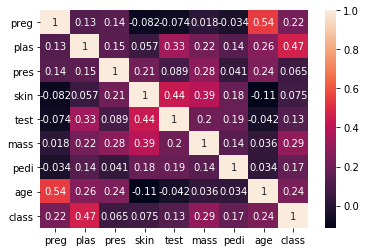

In [11]:
import seaborn as sns
%matplotlib inline

sns.heatmap(corr, annot = True)

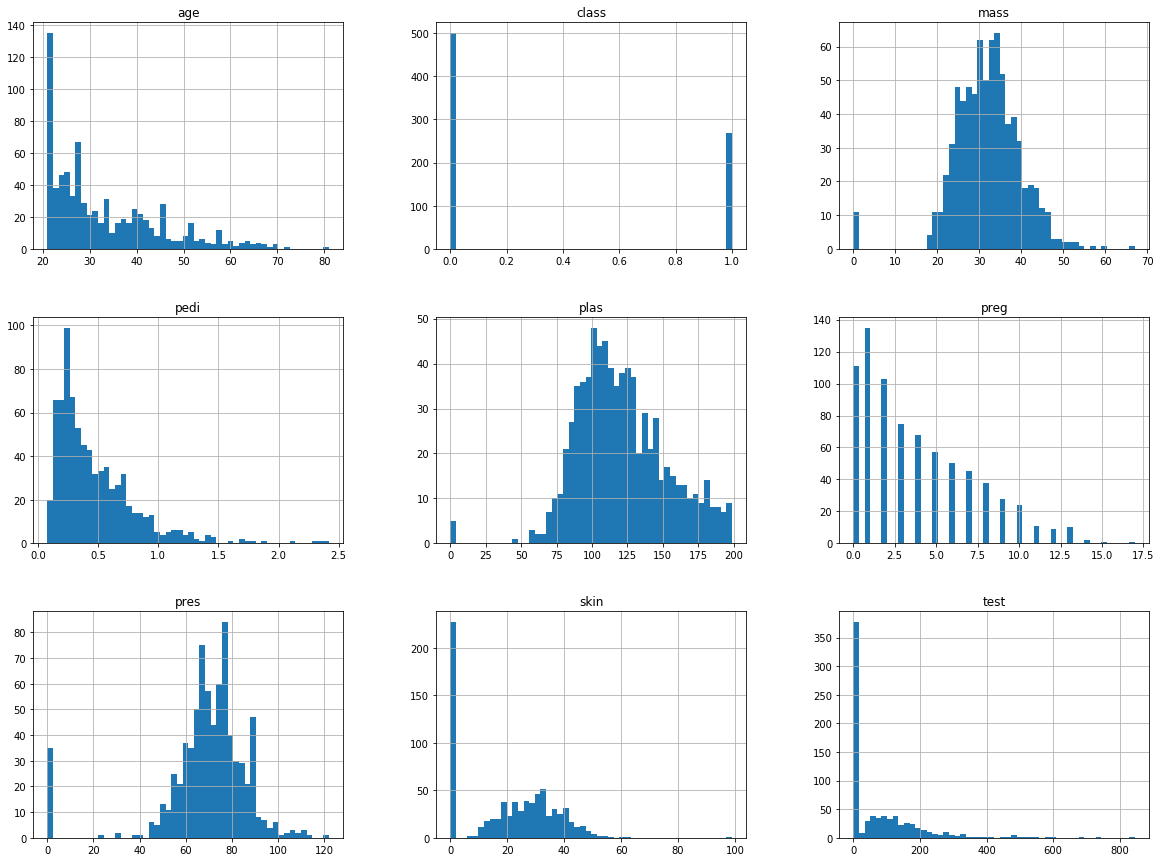

In [12]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

## Clean up data
There are values that must not be zero or null. Either drop it or substitute it with a median value.

### The ff. column must not have zero or null or NaN:

plas  = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres  = Diastolic blood pressure (mm Hg)

skin  = Triceps skin fold thickness (mm)

test  = 2-Hour serum insulin (mu U/ml)

mass  = Body mass index (weight in kg/(height in m)^2)

In [13]:
# Substituting pathway

# Calculate the median value
median_plas = df['plas'].median()
# replace 0 with median
df['plas'] = df['plas'].replace(to_replace=0, value=median_plas)

In [14]:
# Calculate the median value
median_pres = df['pres'].median()
# replace 0 with median
df['pres'] = df['pres'].replace(to_replace=0, value=median_pres)

In [15]:
# Calculate the median value
median_test = df['test'].median()
# replace 0 with median
df['test'] = df['test'].replace(to_replace=0, value=median_test)

In [16]:
# Calculate the median value
median_bmi = df['mass'].median()
# replace 0 with median
df['mass'] = df['mass'].replace(to_replace=0, value=median_bmi)

In [17]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,20.536458,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,15.952218,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Split the data into train and test

In [18]:
X = df.drop(['class'], axis=1)
y = df['class']

In [19]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [20]:
print(y[:5])

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64


In [21]:
# Apply a scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [22]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
X_scaled = scaler.transform(X)

In [24]:
scaled_df = pd.DataFrame(X_scaled)
scaled_df.describe()

,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,7.661695e-18,-1.123956e-17,7.994184e-17,1.214306e-17,4.803738e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-1.288212e+00,-7.646304e-01,-2.074100e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-1.288212e+00,-6.082010e-01,-7.205635e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,1.545332e-01,-6.010905e-01,-6.562636e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,7.190857e-01,3.090444e-01,6.038649e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,4.921866e+00,7.123206e+00,5.042883e+00,5.883565e+00,4.063716e+00


In [25]:
scaled_df.head(3)

,0,1,2,3,4,5,6,7
0,0.639947,0.866045,-0.031990,0.907270,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,0.530902,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-1.288212,-0.608201,-1.331838,0.604397,-0.105584


In [26]:
# Split the training dataset
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [28]:
# Train the dataset
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [32]:
# define a seed
seed=6
np.random.seed(seed)

# create Dl model
def create_DL_model(neuron1, neuron2, learn_rate, dropout_rate, activation, init):
    model = Sequential()
    model.add(Dense(neuron1, input_dim=neuron1, kernel_initializer=init, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2, input_dim=neuron1, kernel_initializer=init, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    adam=Adam(learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

dl_model = create_DL_model(8, 4, 0.01, 0.0, 'relu', 'normal')
print(dl_model.summary())

keras_model = KerasClassifier(build_fn=create_DL_model, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_25 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dropout_26 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 5         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
# define parameters
batch_size=[10,20,40]
epochs=[10,50,100]
learn_rate=[0.001,0.01,0.1]
dropout_rate=[0.0,0.1,0.2]
activation=['softmax','relu','tanh','linear']
init=['uniform','normal','zero']
neuron1=[8]
neuron2=[4]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  learn_rate=learn_rate,
                  dropout_rate=dropout_rate,
                  activation=activation,
                  init=init,
                  neuron1=neuron1,
                  neuron2=neuron2)

grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=KFold(random_state=seed), verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.719, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.641, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.641, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4, score=0.792, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4, score=0.755, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.5s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.01, neuron1=8, neuron2=4, score=0.745, total=   0.8s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    4.2s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4, score=0.760, total=   0.8s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    5.0s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4, score=0.698, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.7s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learn_rate=0.1, neuron1=8, neuron2=4, score=0.729, total=   0.7s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.5s remaining:    0.0s


[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4, score=0.682, total=   0.9s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4, score=0.641, total=   0.8s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4 
[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.001, neuron1=8, neuron2=4, score=0.641, total=   0.9s
[CV] activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.01, neuron1=8, neuron2=4 
[CV]  activation=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learn_rate=0.01, neuron1=8, neuron2=4, score=0.797, total=   0.9s
[CV] activation=softmax, batch_size=

[Parallel(n_jobs=1)]: Done 2916 out of 2916 | elapsed: 57.0min finished


In [35]:
print('Best: {0}, using{1}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Best: 0.7829861090415053, using{'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learn_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
0.6666666693571541 (0.03682847606482268) with: {'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learn_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
0.763888886405362 (0.02009693724372015) with: {'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learn_rate': 0.01, 'neuron1': 8, 'neuron2': 4}
0.7291666701332562 (0.02551551631630567) with: {'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'uniform', 'learn_rate': 0.1, 'neuron1': 8, 'neuron2': 4}
0.6545138931315806 (0.019641855106131464) with: {'activation': 'softmax', 'batch_size': 10, 'dropout_rate': 0.0, 'epochs': 10, 'init': 'normal', 'learn_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
0.7673611094554266 (0.02182257574561479) with: {'acti

In [39]:
# Best: 0.7829861090415053, using{'activation': 'relu', 'batch_size': 10, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'uniform', 'learn_rate': 0.001, 'neuron1': 8, 'neuron2': 4}
batch_size=[10]
epochs=[50]
learn_rate=[0.001]
dropout_rate=[0.1]
activation=['relu']
init=['uniform']
neuron1=[8]
neuron2=[4]
param_grid = dict(batch_size=batch_size,
                  epochs=epochs,
                  learn_rate=learn_rate,
                  dropout_rate=dropout_rate,
                  activation=activation,
                  init=init,
                  neuron1=neuron1,
                  neuron2=neuron2)

grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, cv=KFold(random_state=seed), refit=True, verbose=10)
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.797, total=   1.5s
[CV] activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV]  activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.745, total=   1.4s
[CV] activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV]  activation=relu, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learn_rate=0.001, neuron1=8, neuron2=4, score=0.755, total=   1.5s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


In [40]:
y_pred = grid.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

In [42]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7135416666666666
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       123
           1       0.59      0.64      0.62        69

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.69       192
weighted avg       0.72      0.71      0.72       192



## Comparing multiple algorithms

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [47]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('LSVC', LinearSVC(max_iter=6800)))
models.append(('RFC', RandomForestClassifier(n_estimators=10)))
models.append(('DTR', DecisionTreeRegressor()))

In [48]:
seed=6
results = []
names = []

In [49]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (
        name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.777526 (0.063592)
KNN: 0.758681 (0.043320)
NB: 0.758409 (0.068194)
SVC: 0.758469 (0.056927)
LSVC: 0.777556 (0.065790)
RFC: 0.758651 (0.077232)
DTR: 0.678615 (0.060028)


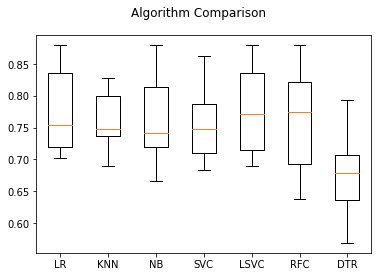

In [50]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [51]:
params = {
    'max_iter':[100,110,120,130,140],
    'solver':['lbfgs','liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=1).fit(X_train, y_train)

print ("Best Params: {}".format(lr_gs.best_params_))
print ("Best Score: {}".format(lr_gs.best_score_))

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params: {'C': 0.13133050505050503, 'max_iter': 100, 'solver': 'lbfgs'}
Best Score: 0.7795138888888888


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed:    5.5s finished


In [52]:
lr_best = LogisticRegression(C=0.13133050505050503,max_iter=100,solver='lbfgs')
lr_best.fit(X_train, y_train)
print('Best score: {}'.format(lr_best.score(X_test, y_test)))
y_pred=lr_best.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Best score: 0.7447916666666666
Accuracy score: 0.7447916666666666
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       123
           1       0.66      0.61      0.63        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.72       192
weighted avg       0.74      0.74      0.74       192



In [53]:
# Gridsearch to determine the value of C
LSVC=LinearSVC()
param_grid = {'C':np.arange(1000,10000,100)}
linearSVC = GridSearchCV(LSVC,param_grid,cv=5,return_train_score=True)
linearSVC.fit(X_train,y_train)
print(linearSVC.best_params_)
print ("Best Params: {}".format(linearSVC.best_params_))
print ("Best Score: {}".format(linearSVC.best_score_))

C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

{'C': 3100}
Best Params: {'C': 3100}
Best Score: 0.7361111111111112


C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergenc

In [54]:
LSVC_best=LinearSVC(C=3100)
LSVC_best.fit(X_train,y_train)
print('Best score: {}'.format(LSVC_best.score(X_test, y_test)))
y_pred=LSVC_best.predict(X_test)
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Best score: 0.703125
Accuracy score: 0.703125
              precision    recall  f1-score   support

           0       0.74      0.84      0.78       123
           1       0.62      0.46      0.53        69

    accuracy                           0.70       192
   macro avg       0.68      0.65      0.66       192
weighted avg       0.69      0.70      0.69       192



C:\Users\kim\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [56]:
# We create a new (fake) person having the three most correated values high
new_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 0.627, 65]])
# We scale those values like the others
new_df_scaled = scaler.transform(new_df)

# We predict the outcome
prediction = LSVC_best.predict(new_df_scaled)
# prediction = lr_best.predict(new_df_scaled)

# A value of "1" means that this person is likley to have type 2 diabetes
prediction

array([1], dtype=int64)